In [1]:
from src.dataloaders.brats import BRATS
from src.dataloaders.elastic_trans import BRATS as BRATS_EL
from src.dataloaders.affine_trans import BRATS as BRATS_AFF
from src.models.unet import UNet
from src.utils import get_device, IoU as iou
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

lr = 0.0001
nr_epochs = 5
loss = "dice"
n_filters = 32

device = get_device()

model = UNet().to(device)
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train_set = BRATS_EL('../../../../special-course/data/BRATS_20_images', mode="train", subset=0.6, size=[64, 64, 155])
valid_set = BRATS('../../../../special-course/data/BRATS_20_images', mode='val', subset=0.6, size=[64, 64, 155])

train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True, drop_last=True)
valid_dataloader = torch.utils.data.DataLoader(valid_set, batch_size=1, shuffle=False, drop_last=False)
print('train', len(train_set), len(train_dataloader))
print('val', len(valid_set), len(valid_dataloader))


Using mps
train 1860 1860
val 310 310


----------Epoch 0/5:loss-0.0
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(62.) True <class 'torch.Tensor'> torch.float32
222 metatensor(61.0772) False 1.0 0.0 torch.float32
333 metatensor(62.) True torch.float32
-epoch 0 index 2 batch 0


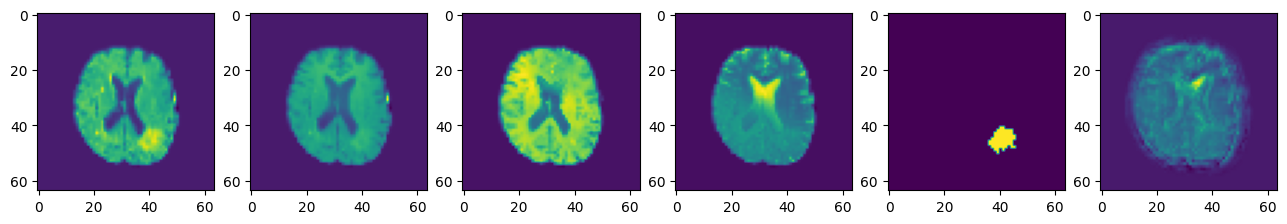

111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(59.) True <class 'torch.Tensor'> torch.float32
222 metatensor(58.3306) False 1.0 0.0 torch.float32
333 metatensor(56.) True torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False t

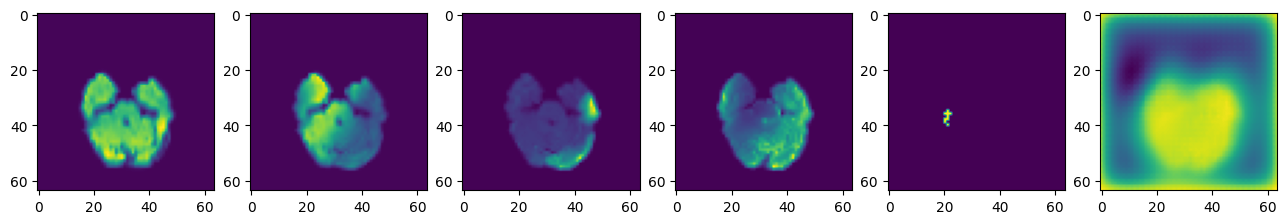

111 tensor(104.) True <class 'torch.Tensor'> torch.float32
222 metatensor(100.4473) False 1.0 0.0 torch.float32
333 metatensor(104.) True torch.float32
111 tensor(347.) True <class 'torch.Tensor'> torch.float32
222 metatensor(332.7979) False 1.0 0.0 torch.float32
333 metatensor(335.) True torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 metatensor(0.) False torch.float32
111 tensor(28.) True <class 'torch.Tensor'> torch.float32
222 metatensor(27.1012) False 1.0 0.0 torch.float32
333 metatensor(28.) True torch.float32
111 tensor(48.) True <class 'torch.Tensor'> torch.float32
222 metatensor(53.4430) False 1.0 0.0 torch.float32
333 metatensor(51.) True torch.float32
111 tensor(0.) False <class 'torch.Tensor'> torch.float32
222 metatensor(0.) False 0.0 0.0 torch.float32
333 m

KeyboardInterrupt: 

In [2]:
for epoch in range(nr_epochs):
    epoch_loss = 0.0
    train_loss = 0.0
    train_iou = 0.0
    print(f'----------Epoch {epoch}/{nr_epochs}:loss-{epoch_loss}\n', end='')
    for index, (inputs, targets, _) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        logits = model(inputs)
        optimizer.zero_grad()

        criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor(0.0115))
        loss = criterion(logits, targets)
        # loss = loss_function(logits, targets)
        loss.backward()
        optimizer.step()

        train_loss += float(loss)
        train_iou += float(iou(targets.detach(), torch.sigmoid(logits.detach()).ge(0.5)))
        if index == 2:#and (not is_sweep):
                for i in range(0, len(inputs)):
                    np_img = inputs.cpu().numpy()
                    np_target = targets.cpu().numpy()
                    np_pred = logits.cpu().detach().numpy()
                    # print('-epoch', epoch, 'index', index, 'loss for current index', loss.item(), 'loss', train_loss, 'iou', train_iou)
                    print('-epoch', epoch, 'index', index, 'batch', i)
                    # print(np_img.shape, np_target.shape, np_pred.shape)
                    if np_target.any():
                        fig, ax = plt.subplots(1, 6, figsize=(16,16))
                        ax[0].imshow(np_img[0, 0, :, :])
                        ax[1].imshow(np_img[0, 1, :, :])
                        ax[2].imshow(np_img[0, 2, :, :])
                        ax[3].imshow(np_img[0, 3, :, :])
                        ax[4].imshow(np_target[0, 0, :, :])
                        ax[5].imshow(np_pred[0, 0, :, :])
                        plt.show()

    print(f'end of training for epoch{epoch}- loss {train_loss} -iou {train_iou}')
    val_loss = 0
    val_iou = 0
    model.eval()
    with torch.no_grad():
        test_loss = 0
        for index, (inputs, targets, _) in enumerate(valid_dataloader):
            val_inputs, val_targets = inputs.to(device), targets.to(device)
            val_logits = model(val_inputs)
            # loss = loss_function(val_logits, val_targets)
            # pos_weight = compute_pos_weight(targets)
            criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor(0.0115))
            loss = criterion(val_logits, val_targets)
            val_loss += loss.detach().item()
            val_loss += float(loss)
            val_iou += iou(val_targets.detach(), torch.sigmoid(val_logits.detach()).ge(0.5))
        print(f'----------end of validation for epoch{epoch}- loss {val_loss} -iou {val_iou}')

